#### This notebook looks into the estimated variances for the connectivity weights

In [1]:
import init_paths
import numpy as np
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import Functional_Fusion.dataset as fdata
import Functional_Fusion.atlas_map as at
import glob
import matplotlib.pyplot as plt
from cortico_cereb_connectivity.scripts.script_train_eval_models import *
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def fit_normal_to_data():
    config = rm.get_eval_config(model='ind', cerebellum='MNISymC3')
    dataset = fdata.get_dataset_class(gl.base_dir,
                                        dataset="MDTB")
    config["subj_list"] = dataset.get_participants().participant_id
    mu = np.empty((24,))
    std = np.empty((24,))

    ext_list = [8]
    dirname=[]
    mname=[]
    for a in ext_list:
        dirname.append(f"MDTB_CondHalf_ses-s1_run-all_Icosahedron1002_L2reg")
        mname.append(f"MDTB_CondHalf_ses-s1_run-all_Icosahedron1002_L2reg_A{a}")

    fitted_model,train_info = rm.get_fitted_models(dirname,mname,config)

    for i, (fm, ti) in enumerate(zip(fitted_model[0], train_info[0])):
        mu[i], std[i] = stats.norm.fit(fm.coef_.T.flatten())
    
    return mu, std

In [3]:
mu, std = fit_normal_to_data()

In [5]:
print(f'Mean of W: {mu}')
print(f'Var of W: {std**2}')

Mean of W: [ 7.09290215e-05 -1.01432945e-05 -3.71331536e-05  8.39153860e-05
  8.12957092e-05 -3.03765373e-05  1.12932331e-04 -2.67782912e-05
 -2.90962938e-05  9.66280759e-05  1.76291706e-05  1.59824093e-05
  1.23599813e-04  1.44092397e-05 -9.74362323e-06  3.66764665e-05
  6.08328481e-05  1.37986172e-04 -8.36729488e-05  4.43139506e-06
  3.65131620e-05  6.29547429e-05 -5.72056846e-05  8.88068596e-05]
Var of W: [1.67107186e-06 1.54681400e-06 1.73887318e-06 1.49527612e-06
 1.55183234e-06 1.61938420e-06 1.51980693e-06 1.53477095e-06
 1.47888084e-06 1.57273986e-06 1.55913502e-06 1.69439572e-06
 1.47412298e-06 1.54121628e-06 1.71882021e-06 1.59275521e-06
 1.56399490e-06 1.61151237e-06 1.57300877e-06 1.65008533e-06
 1.60758264e-06 1.50976769e-06 1.69997281e-06 1.70224660e-06]


In [7]:
config = rm.get_eval_config(model='avg', cerebellum='MNISymC3')
dataset = fdata.get_dataset_class(gl.base_dir, dataset="MDTB")
config["subj_list"] = dataset.get_participants().participant_id
dirname = []
mname = []
dirname.append(f"MDTB_CondHalf_ses-s1_run-all_Icosahedron1002_L2reg")
mname.append(f"MDTB_CondHalf_ses-s1_run-all_Icosahedron1002_L2reg_A8")
fitted_model,train_info = rm.get_fitted_models(dirname,mname,config)

W = fitted_model[0].coef_.T
mu_avg, std_avg = stats.norm.fit(W.flatten())

print(f'Group mean: {mu_avg}')
print(f'Group var: {std_avg**2}')

Group mean: 3.172387395875802e-05
Group var: 1.9303896545947844e-07


In [8]:
print(f'w_ind_var: {np.mean(std)**2 - std_avg**2}')

w_ind_var: 1.398868111607289e-06


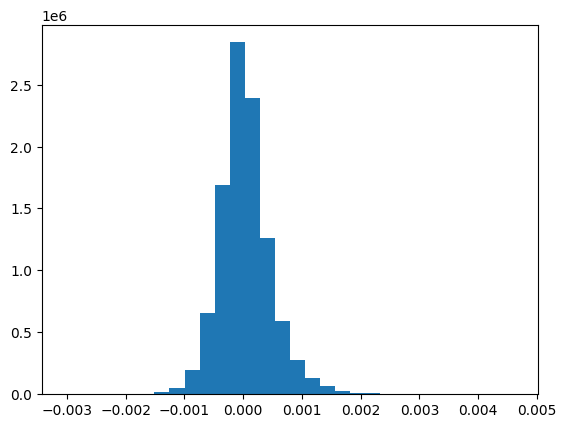

In [9]:
plt.hist(W.flatten(), bins=30)
plt.show()